# Forcasting sales using prophet

In [10]:
import prophet as Prophet
import pandas as pd
import warnings

In [11]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

## Loading Data

In [12]:
# reading the store csv file
merged_df = pd.read_csv("../data/merged.csv")
merged_df.head(10)

,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,DayOfMonth,WeekOfYear,weekday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3
0,0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",0,0,0,0
1,1,1,4,2015-07-30,5020,546,1,1,0,1,2015,7,30,31,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",0,0,0,0
2,2,1,3,2015-07-29,4782,523,1,1,0,1,2015,7,29,31,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",0,0,0,0
3,3,1,2,2015-07-28,5011,560,1,1,0,1,2015,7,28,31,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",0,0,0,0
4,4,1,1,2015-07-27,6102,612,1,1,0,1,2015,7,27,31,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",0,0,0,0
5,5,1,7,2015-07-26,0,0,0,0,0,0,2015,7,26,30,0,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",0,0,0,0
6,6,1,6,2015-07-25,4364,500,1,0,0,0,2015,7,25,30,0,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",0,0,0,0
7,7,1,5,2015-07-24,3706,459,1,0,0,0,2015,7,24,30,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",0,0,0,0
8,8,1,4,2015-07-23,3769,503,1,0,0,0,2015,7,23,30,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",0,0,0,0
9,9,1,3,2015-07-22,3464,463,1,0,0,0,2015,7,22,30,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",0,0,0,0


In [13]:
filtered = pd.DataFrame(merged_df['Sales'])
filtered['Date'] = merged_df['Date']

filtered.head()

,Sales,Date
0,5263,2015-07-31
1,5020,2015-07-30
2,4782,2015-07-29
3,5011,2015-07-28
4,6102,2015-07-27


In [14]:
filtered.dtypes

Sales     int64
Date     object
dtype: object

In [15]:
filtered.dtypes

Sales     int64
Date     object
dtype: object

In [54]:
filtered.rename(columns = {'Date':'ds', 'Sales':'y'}, inplace = True)
data = filtered.groupby("ds").agg({"y": "mean"})
data

,y
ds,
2013-01-01,87.284560
2013-01-02,6233.030493
2013-01-03,5693.112108
2013-01-04,5954.218834
2013-01-05,5337.751570
...,...
2015-07-27,9602.952466
2015-07-28,8174.953363
2015-07-29,7623.284305


In [56]:
filtered['ds'] = pd.to_datetime(filtered['ds'])
filtered.dtypes
data = filtered.groupby("ds").agg({"y": "mean"})
data
sample = filtered[0:7000]

## Train Model

In [57]:
m = Prophet.Prophet(interval_width=0.95, daily_seasonality= True)
model = m.fit(sample)

## Forcasting

In [58]:
future = m.make_future_dataframe(periods=100, freq="D")
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,1097.338711,1876.210695,11270.434225,1097.338711,1097.338711,5323.447031,5323.447031,5323.447031,4392.330852,4392.330852,4392.330852,1437.281298,1437.281298,1437.281298,-506.165119,-506.165119,-506.165119,0.0,0.0,0.0,6420.785741
1,2013-01-02,1096.998059,1218.671757,10763.777378,1096.998059,1096.998059,4834.635183,4834.635183,4834.635183,4392.330852,4392.330852,4392.330852,1000.910435,1000.910435,1000.910435,-558.606104,-558.606104,-558.606104,0.0,0.0,0.0,5931.633242
2,2013-01-03,1096.657408,708.905107,10167.415148,1096.657408,1096.657408,4382.918172,4382.918172,4382.918172,4392.330852,4392.330852,4392.330852,590.102059,590.102059,590.102059,-599.514738,-599.514738,-599.514738,0.0,0.0,0.0,5479.575580
3,2013-01-04,1096.316756,1071.507818,10484.057023,1096.316756,1096.316756,4628.080903,4628.080903,4628.080903,4392.330852,4392.330852,4392.330852,864.715843,864.715843,864.715843,-628.965792,-628.965792,-628.965792,0.0,0.0,0.0,5724.397659
4,2013-01-05,1095.976105,-495.046072,9084.878597,1095.976105,1095.976105,3191.979258,3191.979258,3191.979258,4392.330852,4392.330852,4392.330852,-553.114168,-553.114168,-553.114168,-647.237426,-647.237426,-647.237426,0.0,0.0,0.0,4287.955362


In [59]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2013-01-01,6420.785741
1,2013-01-02,5931.633242
2,2013-01-03,5479.575580
3,2013-01-04,5724.397659
4,2013-01-05,4287.955362
...,...,...
1037,2015-11-04,6361.408257
1038,2015-11-05,5953.583866
1039,2015-11-06,6229.928735
1040,2015-11-07,4813.147743


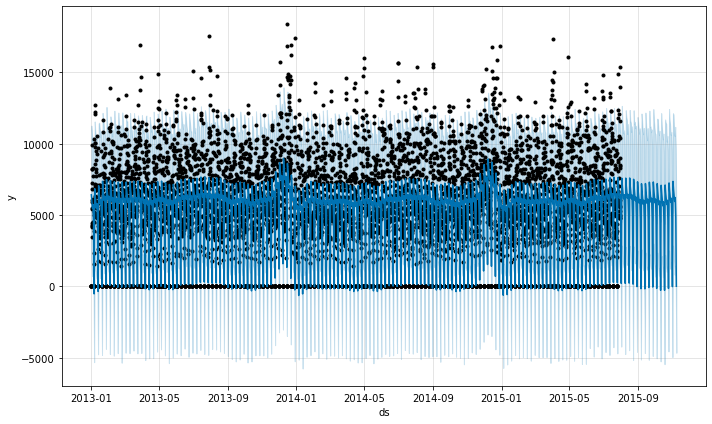

In [60]:
plot1 = m.plot(forecast)

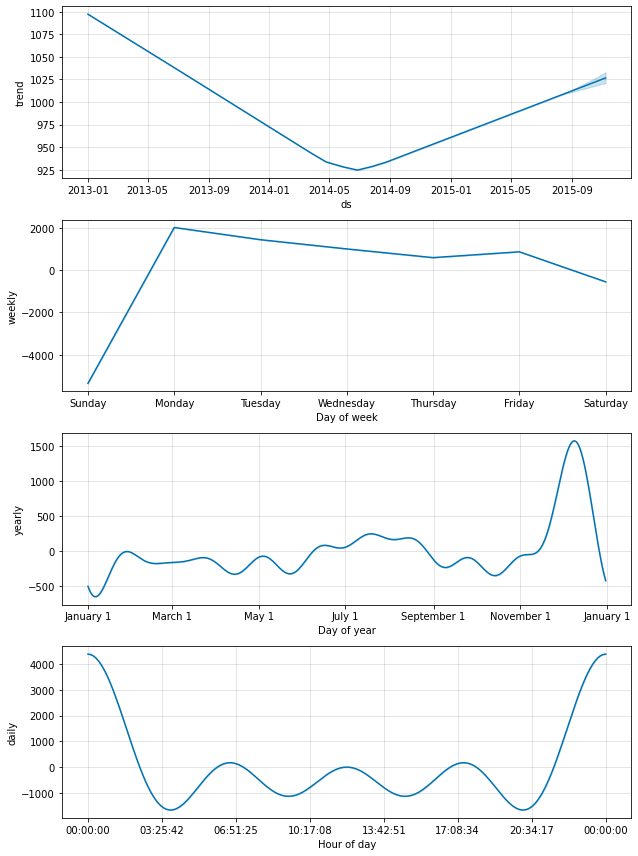

In [61]:
plot2 = m.plot_components(forecast)